## Notebook for CCI-derived metabolism from scRNA-Seq using <span style="color:pink">MEBOCOST</span> in Healthy adult epithelial cells

- **Developed by**: Anna Maguza
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- 30th of June 2023

### Import packages

In [1]:
import os,sys
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from mebocost import mebocost

Warning (xlmhg): Failed to import "mhg_cython" C extension.
Warning (xlmhg): Failed to import the "mhg_cython" C extension.Falling back to the pure Python implementation, which is very slow.


In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.9.1
scanpy      1.8.2
sinfo       0.3.4
-----
Cython              0.29.34
PIL                 9.5.0
adjustText          NA
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
comm                0.1.3
cpuinfo             NA
cycler              0.10.0
cython              0.29.34
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml         

In [3]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

### Data upload

In [4]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/Labels_transfer/scBalance/Joanito_predicted_labels_with_scBalance_7000.h5ad'
adata = sc.read_h5ad(input)
X_is_raw(adata)

False

In [5]:
# Extract the raw counts
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 35714 × 33287
    obs: 'nFeature_RNA', 'pct_counts_mito', 'Sample_ID', 'Donor_ID', 'sample.origin', 'dataset_x', 'Cell Type', 'iCMS', 'msi', 'dataset_y', 'Sex', 'Tumor Stage', 'MSS/MSI', 'Location', 'Side', 'Group Stage', 'Stage TNM', 'iCMS.transcriptomic', 'iCMS.inferCNV', 'KRAS', 'BRAF', 'TP53', 'APC', 'PIK3CA', 'LymphNode', 'Normal', 'Tumor', 'CMS', 'Age_group', 'Study_name', 'Diagnosis', 'n_genes_by_counts', 'total_counts', 'Library_Preparation_Protocol', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'Predicted Label'
    var: 'feature_types', 'genome'
    uns: 'log1p'

In [6]:
X_is_raw(adata)

True

#### Infer metabolic communications

- The mebocost.conf file needs to be provided. It is in the original repo and after installation it will have the correct paths and should work out of the box. You could provide the full path to the file, or create a symlink.


In [9]:
mebo_obj = mebocost.create_obj(
                        adata = adata,
                        group_col = ['Predicted Label'],
                        met_est = 'mebocost',
                        config_path = '/Users/anna.maguza/MEBOCOST/mebocost.conf',
                        exp_mat = None,
                        cell_ann = None,
                        species = 'human',
                        met_pred = None,
                        met_enzyme = None,
                        met_sensor = None,
                        met_ann = None,
                        scFEA_ann = None,
                        compass_met_ann = None,
                        compass_rxn_ann = None,
                        gene_network = None,
                        gmt_path = None,
                        cutoff_exp = 'auto', ## automated cutoff to exclude lowly ranked 25% sensors across all cells
                        cutoff_met = 'auto', ## automated cutoff to exclude lowly ranked 25% metabolites across all cells
                        cutoff_prop = 0.25, ## at lease 25% of cells should be expressed the sensor or present the metabolite in the cell group (specified by group_col)
                        sensor_type = ['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread = 4
                        )

[July 02, 2023 22:57:26]: We get expression data with 33287 genes and 35714 cells.
[July 02, 2023 22:57:26]: Data Preparation Done in 0.1474 seconds


#### Estimate metabolite presence


- If you just want the table of metabolic activity, you can stop here and export it as a CSV file.

In [10]:
mebo_obj._load_config_()
mebo_obj.estimator()

[July 02, 2023 22:57:28]: Load config and read data based on given species [human].
[July 02, 2023 22:57:30]: Estimtate metabolite level using mebocost


In [11]:
met_mat = pd.DataFrame(mebo_obj.met_mat.toarray(),
                      index = mebo_obj.met_mat_indexer,
                      columns = mebo_obj.met_mat_columns)
met_mat.head()

,CRC16_MUX8563_AAACGGGGTCGATTGT-1,CRC16_MUX8563_AAAGATGCAGAAGCAC-1,CRC16_MUX8563_AAAGCAATCTAACGGT-1,CRC16_MUX8563_ACAGCCGGTCTCTTAT-1,CRC16_MUX8563_ACAGCTATCCGTCATC-1,CRC16_MUX8563_ACATACGGTTACGTCA-1,CRC16_MUX8563_ACATGGTGTCCATGAT-1,CRC16_MUX8563_ACCGTAAAGCCCAATT-1,CRC16_MUX8563_ACGAGGACATCTGGTA-1,CRC16_MUX8563_ACGCCGAGTCTGCAAT-1,...,KUL5_EXT127_CATCAGAAGTACGATA-1,KUL5_EXT127_CCAATCCTCGGATGTT-1,KUL5_EXT127_CCGGTAGAGCGTGAAC-1,KUL5_EXT127_CGCTTCATCCAGTAGT-1,KUL5_EXT127_CTACGTCCAGAGTGTG-1,KUL5_EXT127_GACTGCGAGTAGCGGT-1,KUL5_EXT127_GTGCATAGTTTGACAC-1,KUL5_EXT127_TATCAGGGTGTGAAAT-1,KUL5_EXT127_TCACAAGAGATCCCGC-1,KUL5_EXT127_TGGTTCCAGAGATGAG-1
HMDB0003450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HMDB0003948,0.375000,0.125000,0.375000,0.125000,0.500000,0.250000,0.125000,1.250000,0.000000,0.375000,...,0.000000,0.0,0.0,0.000000,0.125000,0.125000,0.625000,0.125000,0.000000,0.250000
HMDB0003712,0.300000,0.200000,0.300000,0.200000,0.600000,0.300000,0.100000,1.000000,0.000000,0.300000,...,0.000000,0.0,0.1,0.000000,0.300000,0.100000,0.600000,0.100000,0.100000,0.300000
HMDB0003945,0.777778,0.222222,0.777778,0.222222,0.444444,0.444444,0.111111,1.333333,0.222222,0.444444,...,0.222222,0.0,0.0,0.444444,0.111111,0.111111,0.666667,0.111111,0.333333,0.222222
HMDB0003949,0.375000,0.125000,0.375000,0.125000,0.500000,0.250000,0.125000,1.250000,0.000000,0.375000,...,0.000000,0.0,0.0,0.000000,0.125000,0.125000,0.625000,0.125000,0.000000,0.250000


#### MEBOCOST cell-cell communication inference

In [12]:
commu_res = mebo_obj.infer_commu(
                                n_shuffle = 1000,
                                seed = 1712, 
                                Return = True, 
                                thread = 4,
                                save_permuation = False,
                                min_cell_number = 3
                            )

[July 02, 2023 22:59:19]: Load config and read data based on given species [human].
[July 02, 2023 22:59:22]: Estimtate metabolite level using mebocost
[July 02, 2023 22:59:39]: Infer communications
[July 02, 2023 22:59:39]: Sensor type used ['Transporter', 'Receptor', 'Nuclear Receptor']
[July 02, 2023 22:59:39]: Parameters: {shuffling: 1000 times, random seed: 1712, thread: 4}
[July 02, 2023 22:59:59]: met_sensor: (357, 8)
[July 02, 2023 22:59:59]: avg_exp: (2182, 12) for (gene, cell) of needed
[July 02, 2023 22:59:59]: avg_met: (589, 12) for (metabolite, cell) of needed
[July 02, 2023 22:59:59]: shuffling 1000 times for generating backgroud
[July 02, 2023 23:00:12]: take exp and met avg for shuffling
[July 02, 2023 23:00:59]: thread: 4
[July 02, 2023 23:01:01]: ABCA1 ~ HMDB0006247
[July 02, 2023 23:01:01]: Normalizing Cluster Mean and Calculating Communication Score
[July 02, 2023 23:01:01]: Calculating P-value
[July 02, 2023 23:01:01]: SLC7A1 ~ HMDB0000517
[July 02, 2023 23:01:01]:

In [13]:
print('sensor_exp cutoff: %s'%mebo_obj.cutoff_exp)
print('metabolite_presence cutoff: %s'%mebo_obj.cutoff_met)

sensor_exp cutoff: 1.0
metabolite_presence cutoff: 0.1666666716337204


In [14]:
# Save results
commu_res.to_csv('/Users/anna.maguza/Desktop/GCA_social_network/8_cell-cell_interactions/Cancer/mebocost/Cancer_epithelial_mebocost_results.csv')

#### Visualise MEBOCOST prediction

- Showing the detailed communications (sender-receiver vs metabolite-sensor) in a dot map

In [15]:
adata.obs['Predicted Label'].value_counts()

TA                        22094
Paneth cells               7622
Colonocyte                 2136
Enterocyte                 1661
Tuft cells                 1400
Stem cells                  555
Epithelial cells            103
Goblet cells                 94
Enteroendocrine cells        31
Microfold cell                9
Enterochromaffin cells        6
L cells                       3
Name: Predicted Label, dtype: int64

[July 02, 2023 23:02:58]: plot heatmap for significant result


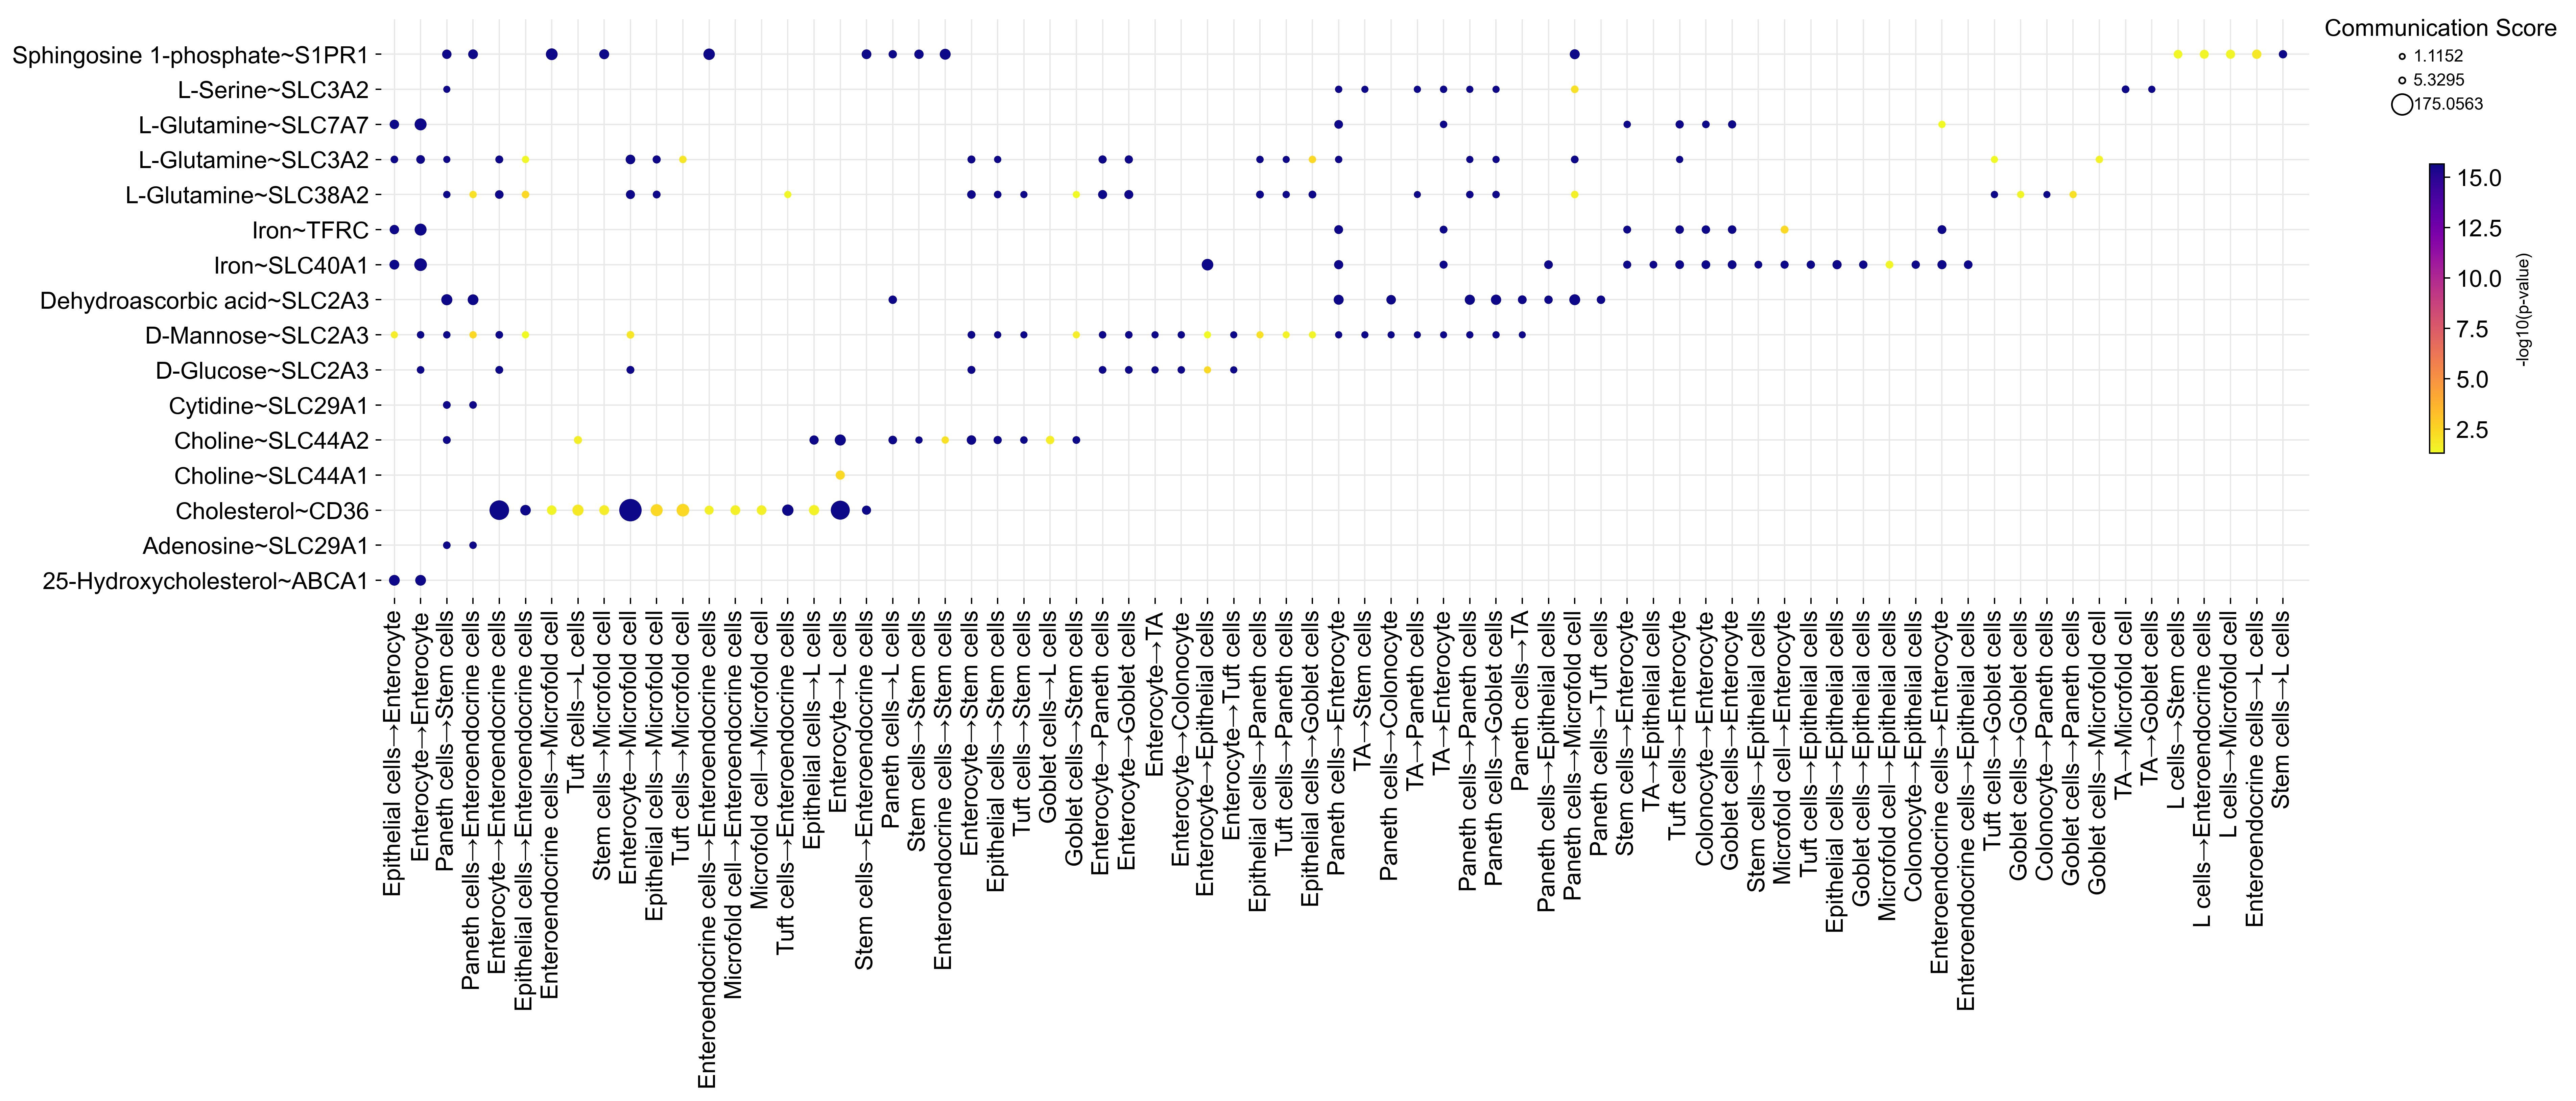

In [16]:
mebo_obj.commu_dotmap(
                sender_focus = [],
                metabolite_focus = [],
                sensor_focus = [],
                receiver_focus = [],
                and_or = 'and',
                pval_method = 'permutation_test_fdr',
                pval_cutoff = 0.05,
                figsize = 'auto',
                cmap = 'plasma_r',
                node_size_norm = (10, 150),
                save = None,
                show_plot = True,
                comm_score_col = 'Commu_Score',
                comm_score_cutoff = 0,
                swap_axis = False,
                return_fig = False
                )


[July 02, 2023 23:04:23]: plot flow plot to show the communications from Sender -> Metabolite -> Sensor -> Receiver


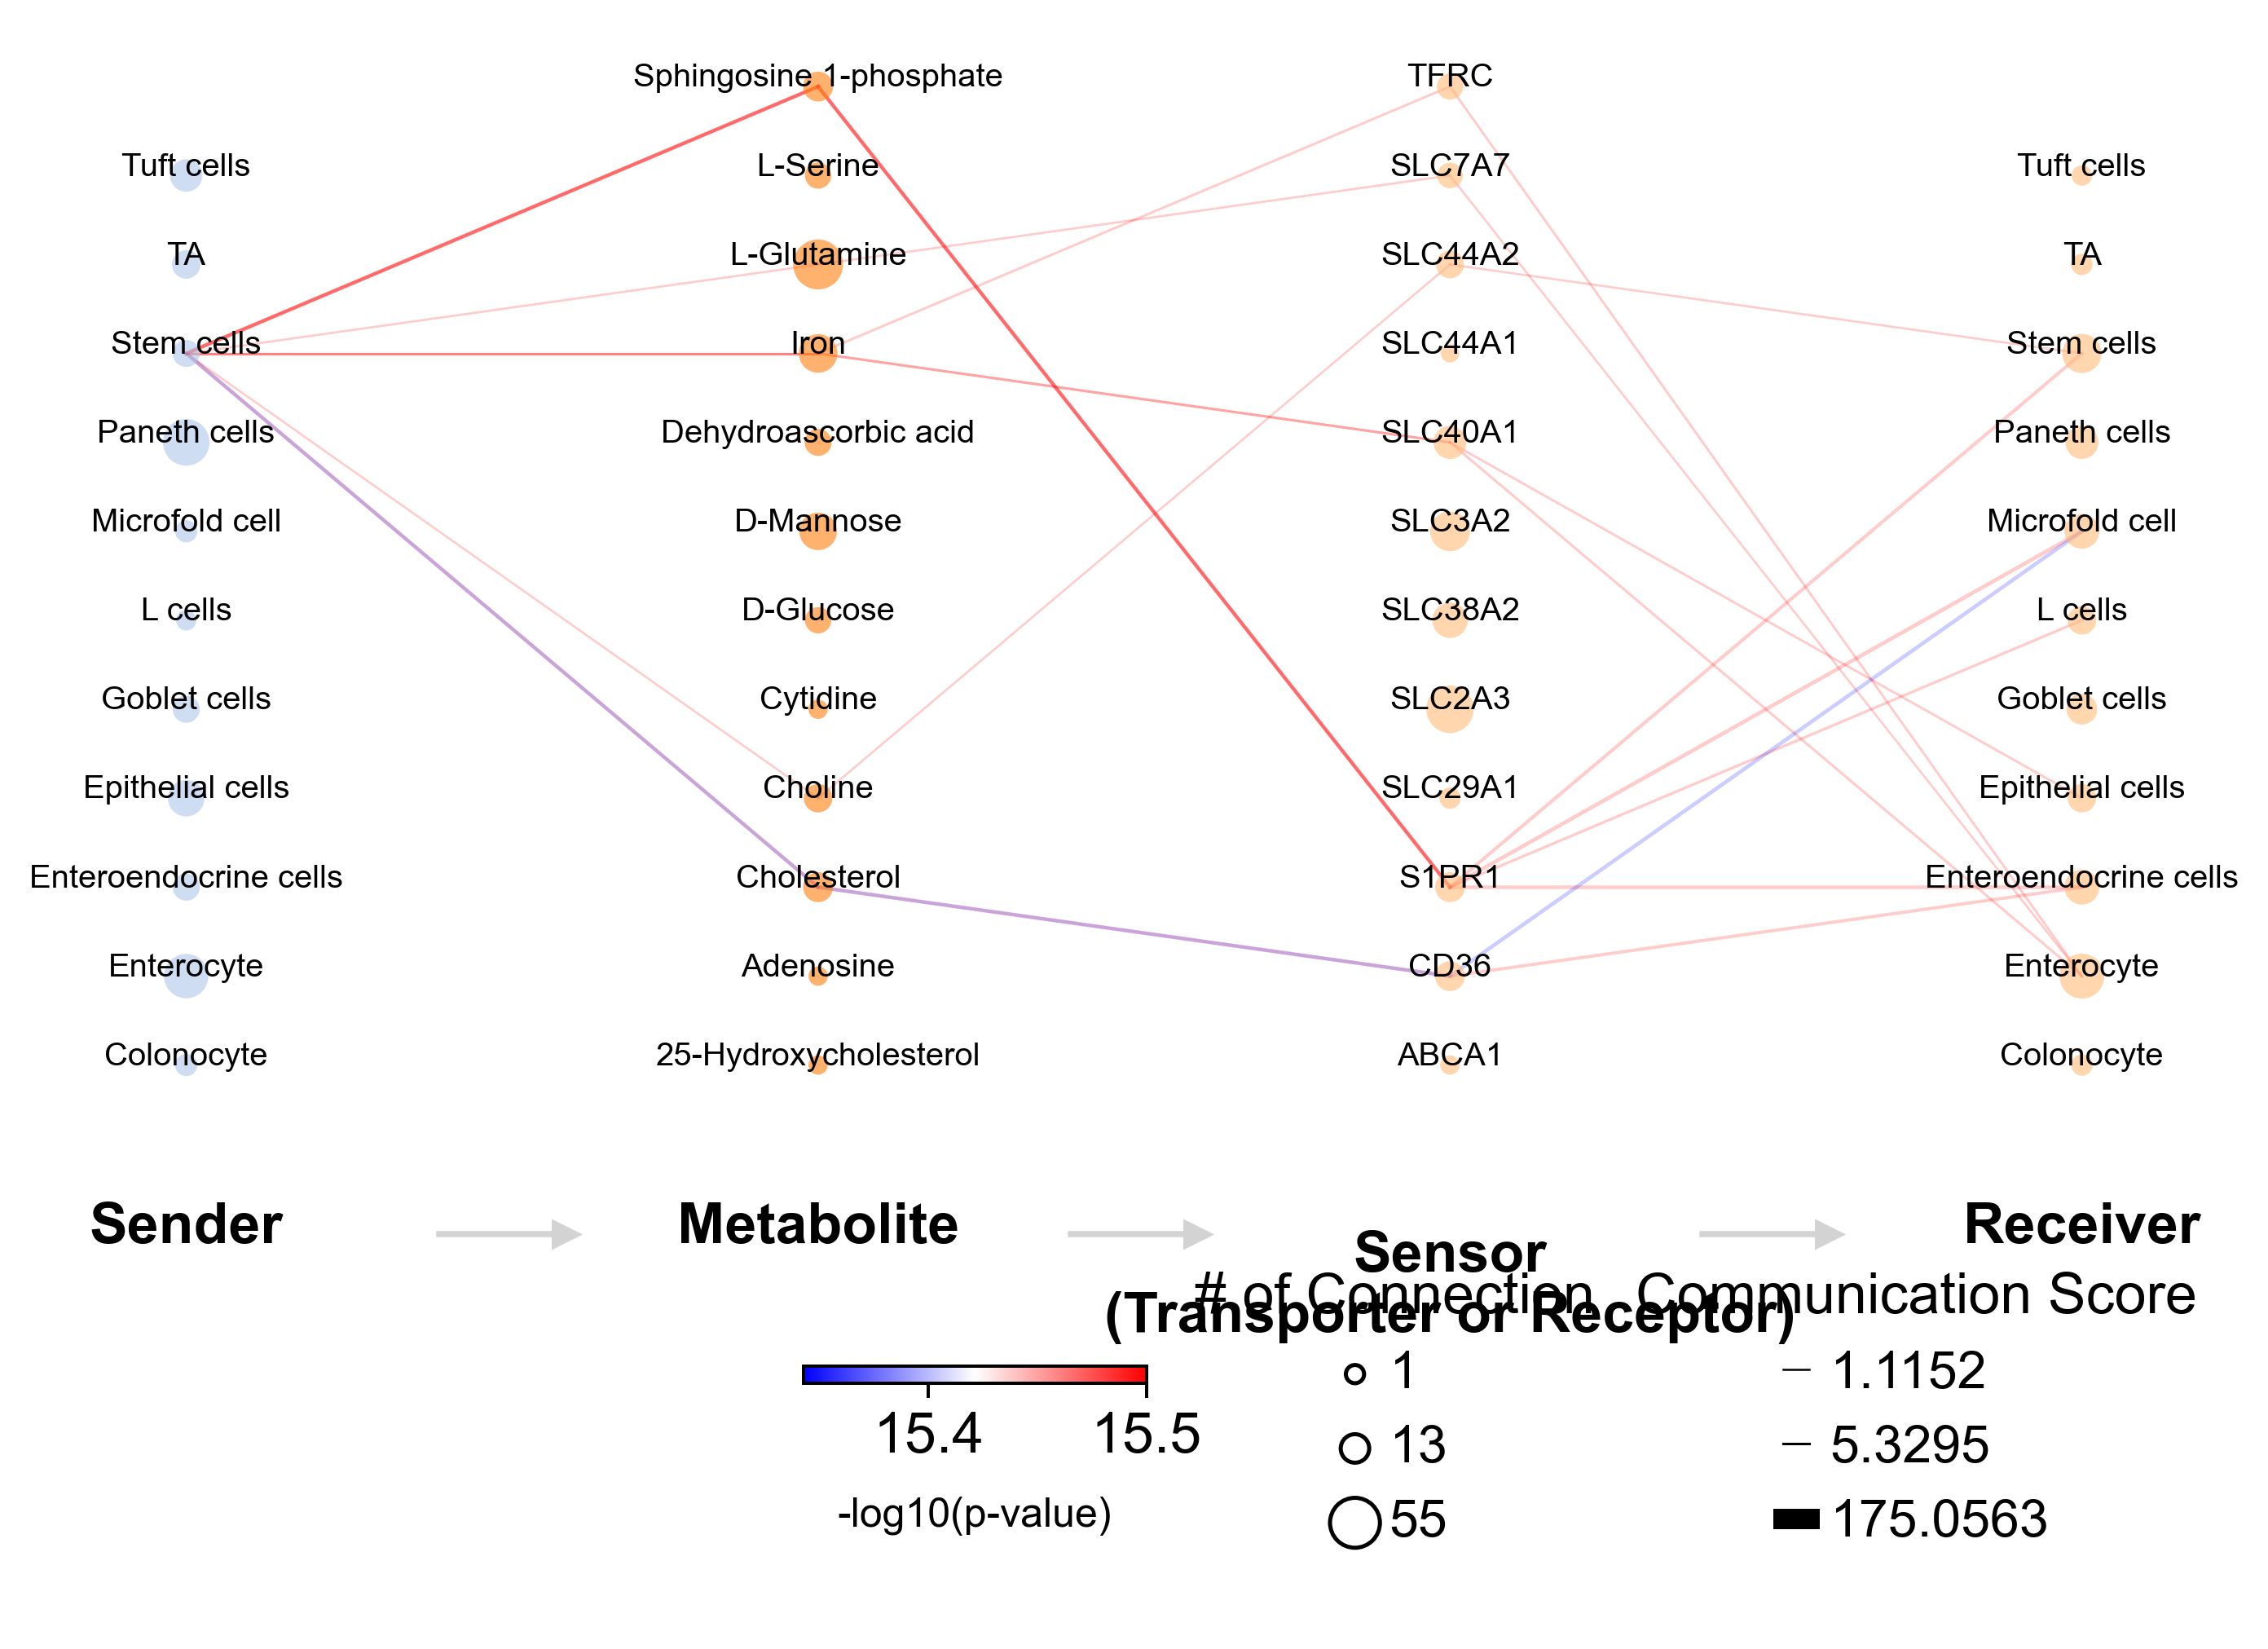

In [18]:
mebo_obj.FlowPlot(
                pval_method = 'permutation_test_fdr',
                pval_cutoff = 0.05,
                sender_focus = ['Stem cells'],
                metabolite_focus = [],
                sensor_focus = [],
                receiver_focus = [],
                remove_unrelevant = False,
                and_or = 'and',
                node_label_size = 8,
                node_alpha = 0.6,
                figsize = 'auto',
                node_cmap = 'tab20',
                line_cmap = 'bwr',
                line_vmin = None,
                line_vmax = 15.5,
                node_size_norm = (20, 150),
                linewidth_norm = (0.5, 5),
                save = None,
                show_plot = True,
                comm_score_col = 'Commu_Score',
                comm_score_cutoff = 0,
                text_outline = False,
                return_fig = False
            )

[July 02, 2023 23:05:37]: plot flow plot to show the communications from Sender -> Metabolite -> Sensor -> Receiver


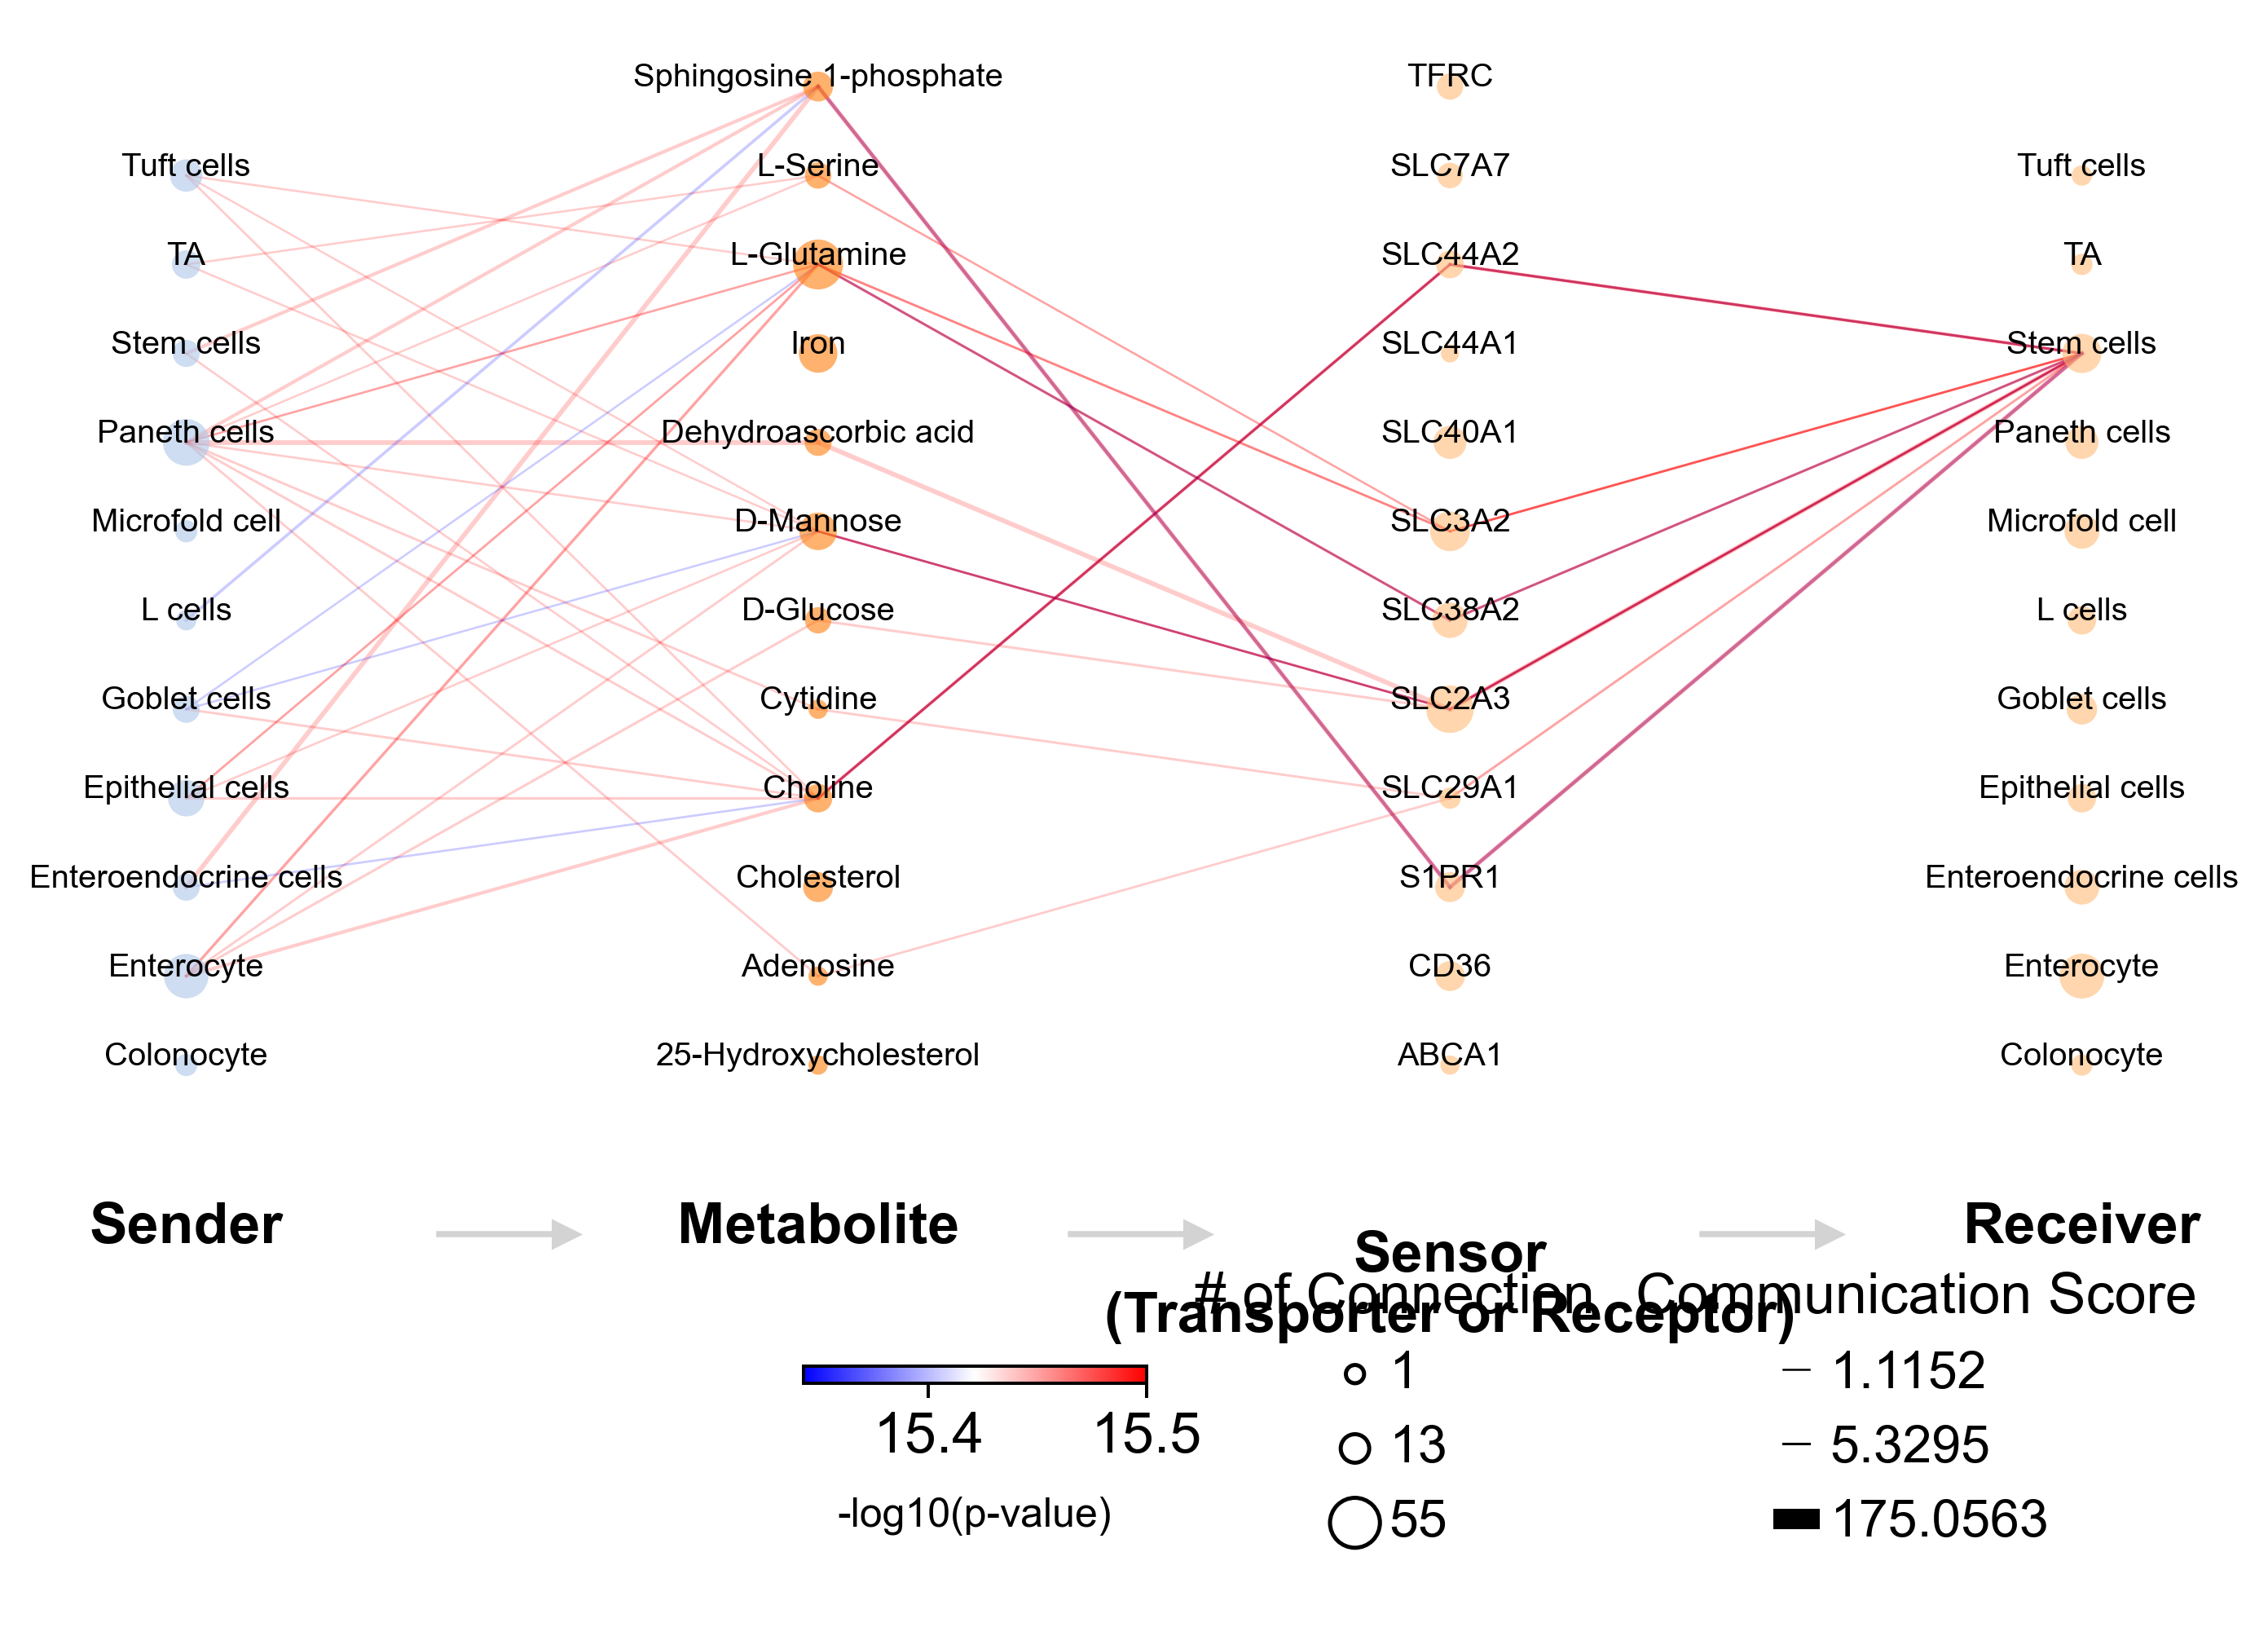

In [19]:
mebo_obj.FlowPlot(
                pval_method = 'permutation_test_fdr',
                pval_cutoff = 0.05,
                sender_focus = [],
                metabolite_focus = [],
                sensor_focus = [],
                receiver_focus = ['Stem cells'],
                remove_unrelevant = False,
                and_or = 'and',
                node_label_size = 8,
                node_alpha = 0.6,
                figsize = 'auto',
                node_cmap = 'tab20',
                line_cmap = 'bwr',
                line_vmin = None,
                line_vmax = 15.5,
                node_size_norm = (20, 150),
                linewidth_norm = (0.5, 5),
                save = None,
                show_plot = True,
                comm_score_col = 'Commu_Score',
                comm_score_cutoff = 0,
                text_outline = False,
                return_fig = False
            )